In [1]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.track(
    source="https://s1.moidom-stream.ru/s/public/0000001301.m3u8", 
    conf=0.3,
    iou=0.7,
    device=None,
    show=False, 
    save=True,
    save_txt=True,
    save_conf=False,
    tracker="bytetrack.yaml",
)

WARNING  Ultralytics settings reset to defaults. This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
View and update settings with 'yolo settings' or at 'C:\Users\User\AppData\Roaming\Ultralytics\settings.yaml'
100%|██████████| 6.23M/6.23M [00:12<00:00, 531kB/s] 
requirements: YOLOv8 requirement "lap>=0.4" not found, attempting AutoUpdate...
     ---------------------------------------- 1.5/1.5 MB 166.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lap: filename=lap-0.4.0-cp310-cp310-win_amd64.whl size=1469491 sha256=c50129f5b174592864f8c61b2e7dc93b823f3a52852b96ecaf525434f3e77f5b
  Stored in directory: C:\Users\User\AppData\Local\Temp\pip-ephem-wheel-cache-6xx2shbv\wheels\00\42\2e\9dfe19270eea279d79e84767ff0d7b8082c3bf776cad00e83d
Successfully built lap

requirements: 1 package updated per ['lap>=0.4']
requirements:  Restart runtim

KeyboardInterrupt: 

In [50]:
import glob

files_path = "runs/detect/track/labels/*.txt"
output_file = "all.txt"
files = glob.glob(files_path)
print(files)
files = sorted(files, key=lambda x: int(x.split('_')[-1].split('.')[0]))

with open(output_file, "w", encoding="utf-8") as outfile:
    for i, f in enumerate(files):
        with open(f, "r", encoding="utf-8") as infile:
            for line in infile:
                line = line.split(" ")
                cls = line[0]
                id = line[-1].replace("\n", "") if len(line) == 6 else None
                outfile.write(f"{i}\t{cls}\t{id}\n")

['runs/detect/track/labels\\0000001301_0.txt', 'runs/detect/track/labels\\0000001301_1.txt', 'runs/detect/track/labels\\0000001301_10.txt', 'runs/detect/track/labels\\0000001301_100.txt', 'runs/detect/track/labels\\0000001301_101.txt', 'runs/detect/track/labels\\0000001301_102.txt', 'runs/detect/track/labels\\0000001301_103.txt', 'runs/detect/track/labels\\0000001301_104.txt', 'runs/detect/track/labels\\0000001301_105.txt', 'runs/detect/track/labels\\0000001301_106.txt', 'runs/detect/track/labels\\0000001301_107.txt', 'runs/detect/track/labels\\0000001301_108.txt', 'runs/detect/track/labels\\0000001301_109.txt', 'runs/detect/track/labels\\0000001301_11.txt', 'runs/detect/track/labels\\0000001301_110.txt', 'runs/detect/track/labels\\0000001301_111.txt', 'runs/detect/track/labels\\0000001301_112.txt', 'runs/detect/track/labels\\0000001301_113.txt', 'runs/detect/track/labels\\0000001301_114.txt', 'runs/detect/track/labels\\0000001301_115.txt', 'runs/detect/track/labels\\0000001301_116.txt

In [56]:
# Открытие исходного файла для чтения
with open('all22.txt', 'r') as f:
    lines = f.readlines()

d = {}
for line in lines:
    time, cls, id = line.replace("\n", "").split('\t')
    if id == 'None':
        continue
    if id in d:
        d[id]["time"] = int(time) - d[id]["time_in"]
    else:
        d[id] = {"cls": cls, "time_in": int(time), "time": 0}

with open('all_new.txt', 'w') as f:
    for id in d.keys():
        f.write(f"""{id}\t{d[id]["cls"]}\t{d[id]["time_in"]}\t{d[id]["time"]}\n""")


[0, 248, 101, 102, 330, 102, 105, 102, 240, 114, 219, 108, 110, 108, 112, 105, 105, 112, 115, 109, 106, 2, 7, 9, 698, 111, 9, 0, 0, 113, 110, 203, 105, 93, 88, 96, 98, 103, 92, 317, 1, 1, 103, 102, 94, 88, 91, 106, 207, 94, 107, 100, 100, 93, 101, 97, 98, 10, 102, 6, 6, 117, 109, 413, 106, 95, 102, 101, 97, 101, 106, 110, 107, 107, 110, 4, 110, 112, 558, 235, 114, 228, 112, 104, 112, 329, 106, 2, 229, 112, 109, 255, 105, 8, 95, 6, 0, 100, 0, 0, 99, 0, 428, 104, 111, 110, 104, 113, 110, 106, 0, 106, 85, 81, 120, 90, 170, 0, 196, 281, 0, 87, 59, 2, 8, 66, 0, 5, 0, 86, 75, 0, 0, 0, 80, 8, 106, 7, 0, 94, 90, 2, 0, 108, 113, 2, 110, 104, 104, 102, 101, 1, 227, 4, 0, 104, 2, 325, 108, 107, 98, 201, 216, 95, 101, 242, 331, 113, 445, 113, 107, 105, 109, 1, 103, 242, 4, 86, 348, 221, 107, 216, 119, 91, 108, 225, 9, 534, 0, 101, 227, 0, 97, 0, 114, 6, 2, 94, 2, 1, 102, 0, 197, 101]


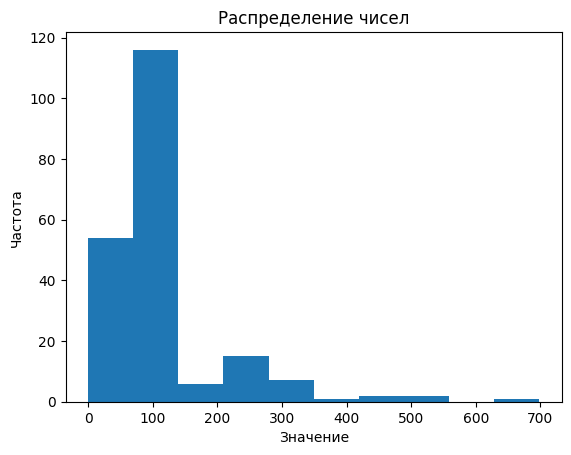

In [67]:
import matplotlib.pyplot as plt

# Создаем список чисел для визуализации
data = [1, 3, 3, 4, 5, 5, 5, 6, 7, 7, 7, 7, 8, 9]
data = [d[id]["time"] for id in d.keys() if d[id]["cls"] == "5"]
print(data)
# Строим гистограмму распределения чисел
plt.hist(data)

# Настройки графика
plt.title('Распределение чисел')
plt.xlabel('Значение')
plt.ylabel('Частота')

# Отображаем график
plt.show()

In [55]:
import os
import datetime

# Задаем временные границы поиска
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

# Перебираем все файлы в директории и проверяем время создания
files = []
for filename in os.listdir('runs/detect/track/labels'):
    file_path = os.path.join('runs/detect/track/labels', filename)
    if os.path.isfile(file_path):
        create_time = datetime.datetime.fromtimestamp(os.path.getctime(file_path))
        if start_date <= create_time <= end_date:
            files.append(file_path)
            
files = sorted(files, key=lambda x: int(x.split('_')[-1].split('.')[0]))

d = {}

for i, f in enumerate(files):
    with open(f, "r", encoding="utf-8") as infile:
        for line in infile:
            line = line.replace("\n", "").split(" ")
            cls = line[0]
            id = line[-1] if len(line) == 6 else None

            if not id:
                continue
            if id in d:
                d[id]["time"] = int(i) - d[id]["time_in"]
            else:
                d[id] = {"cls": cls, "time_in": int(i), "time": 0}

with open('all_new.txt', 'w') as f:
    for id in d.keys():
        f.write(f"""{id}\t{d[id]["cls"]}\t{d[id]["time_in"]}\t{d[id]["time"]}\n""")